The dataset is all TR data
 


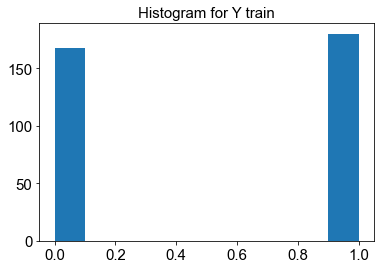

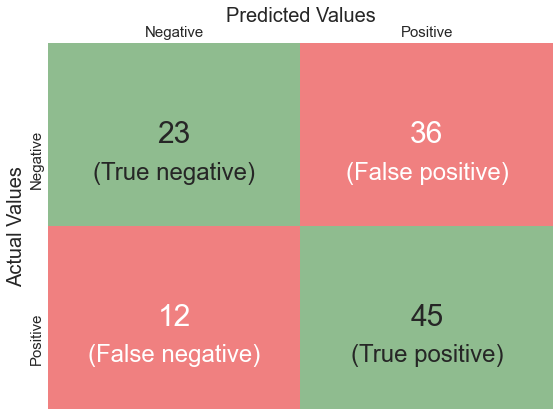

Accuracy train: 53.37226890756301
Accuracy test: 58.620689655172406
Sensitivity: The 65.71428571428571 were correctly identified as not having an ictus
Specificity: The 55.55555555555556 were correctly identified as having an ictus
 
The dataset is all POST data
 


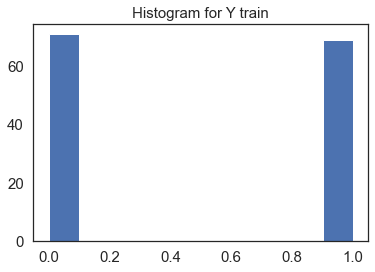

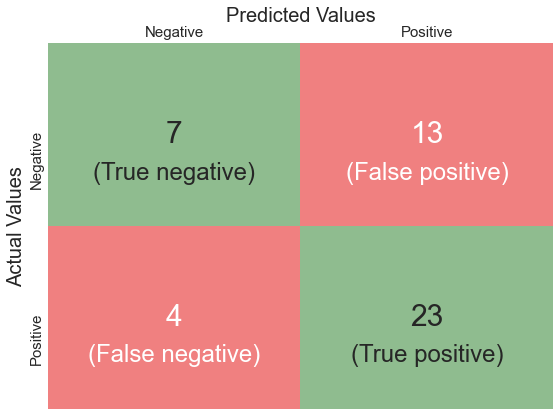

Accuracy train: 56.785714285714285
Accuracy test: 63.829787234042556
Sensitivity: The 63.63636363636363 were correctly identified as not having an ictus
Specificity: The 63.888888888888886 were correctly identified as having an ictus
 
The dataset is PRE data
 


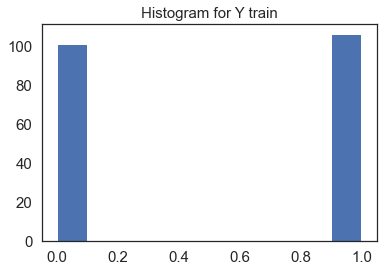

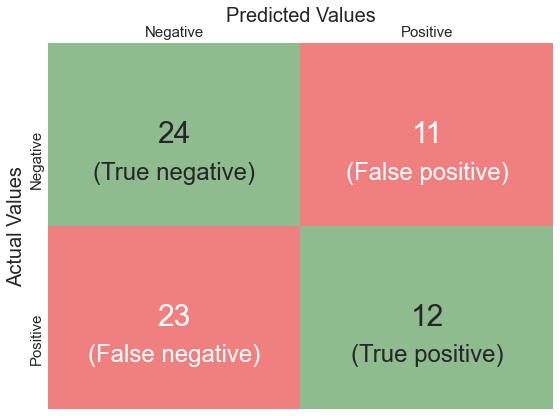

Accuracy train: 45.17142857142857
Accuracy test: 51.42857142857142
Sensitivity: The 51.06382978723404 were correctly identified as not having an ictus
Specificity: The 52.17391304347826 were correctly identified as having an ictus
 
The dataset is POST 24H data
 


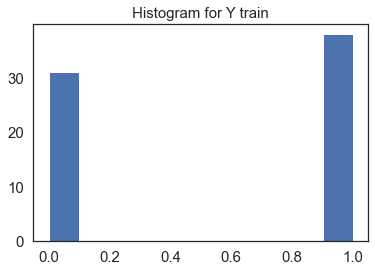

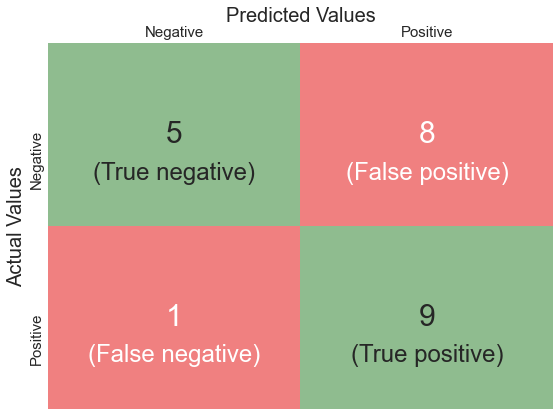

Accuracy train: 54.92857142857142
Accuracy test: 60.86956521739131
Sensitivity: The 83.33333333333334 were correctly identified as not having an ictus
Specificity: The 52.94117647058824 were correctly identified as having an ictus
 
The dataset is POST 48H data
 


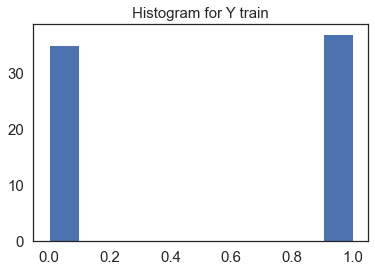

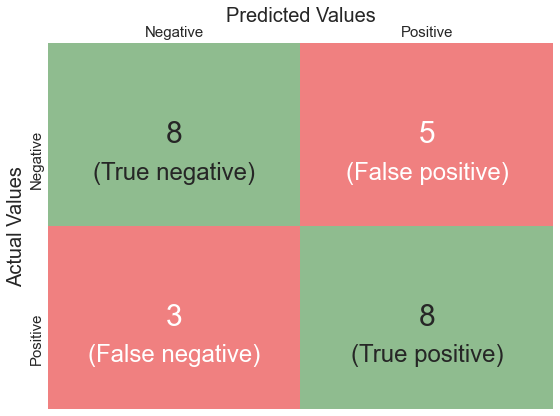

Accuracy train: 55.82142857142857
Accuracy test: 66.66666666666666
Sensitivity: The 72.72727272727273 were correctly identified as not having an ictus
Specificity: The 61.53846153846154 were correctly identified as having an ictus
 
The dataset is POST 72H data
 


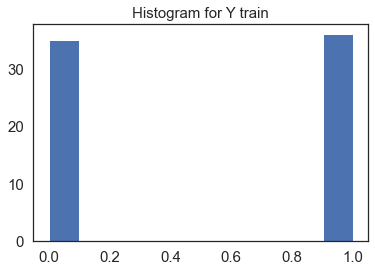

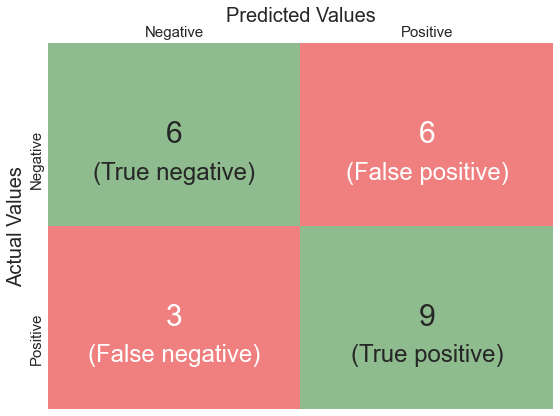

Accuracy train: 64.5
Accuracy test: 62.5
Sensitivity: The 66.66666666666666 were correctly identified as not having an ictus
Specificity: The 60.0 were correctly identified as having an ictus
 


In [2]:
#    
#                  COMBIO PROJECT: DATA ANALISIS
#                  Marta Alcalde & Núria Mercadé     
# 
# ===========================================================================
#             PREDICCTION MODELS - GAUSSIAN NAIVE BAYES
# ===========================================================================
from sklearn.model_selection       import train_test_split
from sklearn.model_selection       import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.model_selection       import cross_val_score
from sklearn.naive_bayes           import GaussianNB
from sklearn.metrics               import confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics               import RocCurveDisplay
from sklearn.preprocessing         import StandardScaler
import seaborn           as sns
import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np

# Set seed
#seed = 100
seed = 90

# Read Excel
#file = "C:/Users/Marta/Dropbox/COMBIO/dades.xlsx"
file = "/Users/nmercade/Desktop/dades.xlsx"

data_dirty   = pd.read_excel(file,header = 0, usecols = "A,B,H:AD")
# Non coherent data
data     = data_dirty.drop([0,1,118,219,342,445])
mydataTR = {0: data.loc[(data["Test"] == "TR - POST - 24H") | (data["Test"] == "TR - POST 48H") |\
                  (data["Test"] == "TR - POST - 72H") | (data["Test"] == "TR - PRE")],\
         1: data.loc[(data["Test"] == "TR - POST - 24H") | (data["Test"] == "TR - POST 48H") |\
                  (data["Test"] == "TR - POST - 72H")],\
         2: data.loc[(data["Test"] == "TR - PRE")], 3: data.loc[(data["Test"] == "TR - POST - 24H")],\
         4: data.loc[(data["Test"] == "TR - POST - 48H")], 5: data.loc[(data["Test"] == "TR - POST - 72H")]}
datTR    = {0: 'all TR data', 1: 'all POST data', 2: 'PRE data', 3: 'POST 24H data', 4: 'POST 48H data', 5: 'POST 72H data'}
  

for jj in range(6):
    data = mydataTR[jj];
    print('The dataset is {}'.format(datTR[jj]))
    print(' ')
    # Define predictor and response variables
    # 1. Response variable:
        # 0: Not having an ictus
        # 1: Having an ictus
    inf = np.array(data["% Infarct"].dropna()); y = [];
    for i in range(len(inf)):
        if inf[i] > 0:
            y.append(1)
        else:
            y.append(0)
    y = np.array(y)

    # 2. Independent variables
    x = data.loc[:,"Moving_time(%)":"TurnR(%)"]; 

    # Creation of two datasets: test and train
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size = 0.25, random_state = seed)

    # Scale the data
    sc = StandardScaler()
    XtrainN = sc.fit_transform(Xtrain)
    XtestN  = sc.transform(Xtest)

    # Visualization of the response variable to prove if it is balanced.
    plt.hist(Ytrain)
    plt.tick_params(labelsize = 15)
    plt.title('Histogram for Y train', fontsize=15)
  
    # Training of the data
    model = GaussianNB()
    model.fit(XtrainN,Ytrain)

    # KFold method
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10, random_state = seed)
    #cv = StratifiedKFold(n_splits = 10)
    # Evaluate model 
    scores = cross_val_score(model, Xtrain, Ytrain, scoring = 'accuracy', cv = cv)
    Ypred  = model.predict(XtestN)

    # Confusion matrix
    cm = confusion_matrix(Ytest,Ypred)
    sns.set(style = 'white')
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(np.eye(2), annot = cm, fmt = 'g', annot_kws = {'size': 30},
                cmap = sns.color_palette(['lightcoral', 'darkseagreen'], as_cmap=True), cbar=False,
                yticklabels=['Negative', 'Positive'], xticklabels=['Negative', 'Positive'], ax=ax)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=19, length = 0)
    ax.set_xlabel('Predicted Values', size = 20)
    ax.set_ylabel('Actual Values', size = 20)
    additional_texts = ['(True negative)', '(False positive)', '(False negative)', '(True positive)']
    for text_elt, additional_text in zip(ax.texts, additional_texts):
        ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(),
                ha='center', va='top', size=24)
    plt.tight_layout()
    plt.tick_params(labelsize = 15)
    plt.show() 
    path = './GNB/CM_{}'.format(jj)
    fig.savefig(path)


    # Test accuracy
    acc = (cm[0,0]+cm[1,1])/sum(sum(cm))*100
    print('Accuracy train: {}'.format(np.mean(scores)*100))
    print('Accuracy test: {}'.format(acc))
    # Sensitivity
    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])*100
    print('Sensitivity: The {} were correctly identified as not having an ictus'.format(sensitivity))
    # Specificity
    specificity = cm[1,1]/(cm[1,1]+cm[0,1])*100
    print('Specificity: The {} were correctly identified as having an ictus'.format(specificity))
    print(' ')


